In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split,KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

%matplotlib inline

In [2]:
df = pd.read_csv("./clean_text.csv")

In [3]:
df.head()

,target,text
0,0,<username> <url> awww that's a bummer you shou...
1,0,is upset that he can't update his facebook by ...
2,0,<username> i dived many times for the ball man...
3,0,my whole body feels itchy and like its on fire
4,0,<username> no it's not behaving at all i'm mad...


In [4]:
df.target.unique()

array([0, 4])

In [5]:
df['target'] = df.target.apply(lambda x:int(x//4))

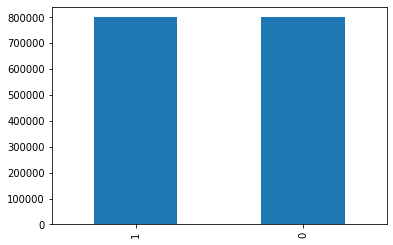

In [6]:
df.target.value_counts().plot.bar()

In [7]:
%%time
cvt = CountVectorizer(binary=True,dtype=np.uint8)
features = cvt.fit_transform(df.text.values)

CPU times: user 21.1 s, sys: 447 ms, total: 21.5 s
Wall time: 21.5 s


In [8]:
X,x,Y,y = train_test_split(features,df.target.values,shuffle=True,random_state=42)

In [9]:
def predict(model,sent,):
    return model.predict(cvt.transform([sent]))

In [10]:
%%time

# Logistic Model

log = LogisticRegression(solver='saga',C=0.3)
log.fit(X,Y)

log.score(X,Y),log.score(x,y)

CPU times: user 47.3 s, sys: 85.8 ms, total: 47.4 s
Wall time: 47.4 s


(0.8175625, 0.7979625)

In [19]:
labels = df.target.values

In [21]:
# 3 fold cv
kfolds = KFold(n_splits=3,shuffle=True)

for i,(train,test) in enumerate(kfolds.split(features,labels)):
    log = LogisticRegression(solver='saga',C=0.3)
    log.fit(features[train],labels[train])
    print (f"Fold : {i} | Train Score : {log.score(features[train],labels[train])}, Test Score : {log.score(features[test],labels[test])}")

Fold : 0 | Train Score : 0.8179561362225851, Test Score : 0.7976821278973402
Fold : 1 | Train Score : 0.8184681817286932, Test Score : 0.7972804983003114
Fold : 2 | Train Score : 0.8176713069777166, Test Score : 0.7981429988393742
